<a href="https://colab.research.google.com/github/Ravimk07/Tensorflow_colab_examples/blob/master/Linear_Regression_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [0]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [0]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [0]:
# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [0]:
# Construct a linear model
activation = tf.add(tf.multiply(X, W), b)

In [0]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [11]:
# Initializing the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch: 0001 cost= 9.015050888 W= -0.32780632 b= 0.40367672
Epoch: 0051 cost= 0.082175776 W= 0.29003975 b= 0.51049954
Epoch: 0101 cost= 0.081573971 W= 0.28763428 b= 0.52780485
Epoch: 0151 cost= 0.081041820 W= 0.28537178 b= 0.54408103
Epoch: 0201 cost= 0.080571286 W= 0.2832438 b= 0.5593893
Epoch: 0251 cost= 0.080155231 W= 0.28124243 b= 0.57378733
Epoch: 0301 cost= 0.079787336 W= 0.2793599 b= 0.5873295
Epoch: 0351 cost= 0.079462096 W= 0.2775895 b= 0.6000656
Epoch: 0401 cost= 0.079174504 W= 0.27592424 b= 0.6120455
Epoch: 0451 cost= 0.078920312 W= 0.27435836 b= 0.6233103
Epoch: 0501 cost= 0.078695551 W= 0.27288562 b= 0.63390505
Epoch: 0551 cost= 0.078496873 W= 0.27150053 b= 0.6438695
Epoch: 0601 cost= 0.078321233 W= 0.27019778 b= 0.65324205
Epoch: 0651 cost= 0.078165986 W= 0.2689724 b= 0.6620565
Epoch: 0701 cost= 0.078028753 W= 0.2678199 b= 0.6703472
Epoch: 0751 cost= 0.077907421 W= 0.26673597 b= 0.67814523
Epoch: 0801 cost= 0.077800199 W= 0.26571643 b= 0.6854797
Epoch: 0851 cost= 0.0777054

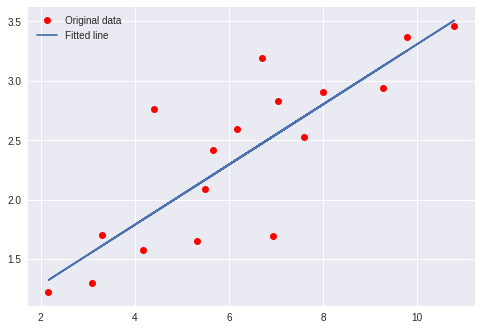

In [12]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()